<div align="right"><sub>Data Science and Machine Intelligence, Semester 2, 2017</sub>
</div>


# Assignment 1
Due Date: Friday, September 1st, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---

### Exercise on Linear Regression   

In this exercise, you will be working with statistical data about crime data in different cities that relate predictors/features such as educational level of the population, government expenditure on policing, individual income and inequality with crime in a given city.  The file containing the data set for this assignment is `crime.csv`.  Make sure you open the file and visually inspect it yourself to understand the structure of your data. 

To summarize, in this data set, the **features/predictors** ($X$) are:

* Education: mean years of schooling of the population aged 25 years or over
* Police: per capita expenditure on police protection
* Income: Average per capita monthly income
* Inequality: Income inequality is calculated as the percentage of families earning below half the median income

and the **response variable/target/outcome** ($y$) is:

* Crime: crime rate as number of offenses per 100,000 population

you can load the data in memory and output the first 5 instances in the dataset using the following code:

In [292]:
import pandas as pd

data = pd.read_csv('crime.csv', index_col=0)
print(data.head())

   Education  Police  Income  Inequality  Crime
1       12.1     5.8    3940        26.1    791
2        7.3    10.3    5570        19.4   1635
3       10.9     4.5    3180        25.0    578
4        6.1    14.9    6730        16.7   1969
5        7.1    10.9    5780        17.4   1234


You can extract the feature matrix $X$ (education, police, income, inequality) and the target vector **y** (crime) using the following code:

In [293]:
import numpy as np
from sklearn.utils import shuffle
feature_cols = ['Education','Police','Income','Inequality']
target = ['Crime']
X = np.array(data[feature_cols])
y = np.array(data[target])
X, y = shuffle(X, y, random_state=1)

1.Plot the Education predictor/feature variable against Crime (the predictor should be on the x axis and crime on the y axis). 

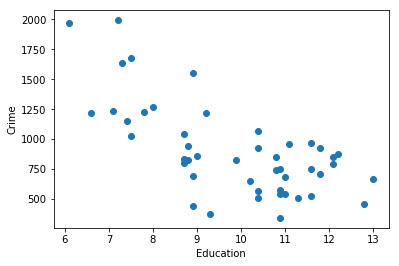

In [294]:
import numpy as npy
import pandas as pnd
import pylab as pyl

data = pnd.read_csv('crime.csv', index_col = 0)
feature_cols = ['Education']
target = ['Crime']
X = npy.array(data[feature_cols])
Y = npy.array(data[target])

%matplotlib inline
pyl.scatter(X, Y)
pyl.xlabel('Education')
pyl.ylabel('Crime')

2.Plot the Police predictor/feature variable against Crime. 

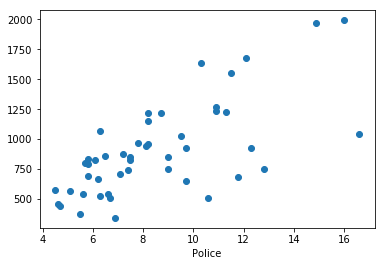

In [295]:
feature_cols = ['Police']
X = npy.array(data[feature_cols])

%matplotlib inline
pyl.scatter(X, Y)
pyl.xlabel('Police')

3.Plot the Income predictor/feature variable against Crime. 

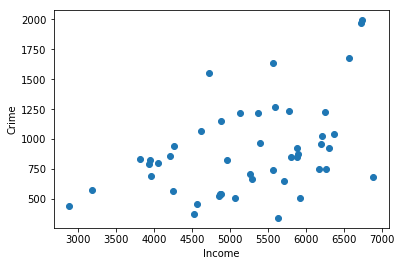

In [296]:
feature_cols = ['Income']
X = npy.array(data[feature_cols])

%matplotlib inline
pyl.scatter(X, Y)
pyl.xlabel('Income')
pyl.ylabel('Crime')

4.Plot the Inequality predictor/feature variable against Crime. 

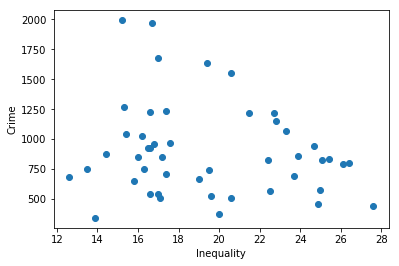

In [297]:
feature_cols = ['Inequality']
X = npy.array(data[feature_cols])

%matplotlib inline
pyl.scatter(X, Y)
pyl.xlabel('Inequality')
pyl.ylabel('Crime')

5.Is the education variable positively or negatively correlated with crime?

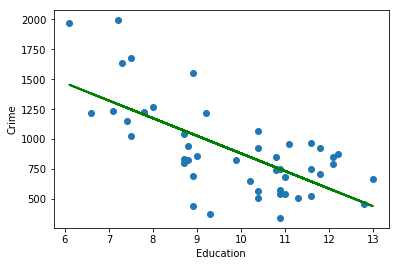

In [298]:
#Education negatively corrolates with crime as seen in the following graph.
from sklearn import linear_model

feature_cols = ['Education']
X = npy.array(data[feature_cols])

lnmd = linear_model.LinearRegression()
lnmd.fit(X, Y);

%matplotlib inline
pyl.scatter(X, Y)
pyl.plot(X, lnmd.predict (X.reshape(-1 , 1)), color = 'green', linewidth = 2);
pyl.xlabel('Education')
pyl.ylabel('Crime')

6.Is the police variable positively or negatively correlated with crime?

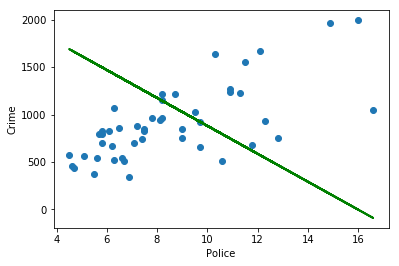

In [299]:
#Police positively corrolates with crime as seen in the following graph.

feature_cols = ['Police']
X = npy.array(data[feature_cols])

%matplotlib inline
pyl.scatter(X, Y)
pyl.plot(X, lnmd.predict (X.reshape(-1 , 1)), color = 'green', linewidth = 2);
pyl.xlabel('Police')
pyl.ylabel('Crime')

7.Split the data in 2 halves: training set and test set

In [300]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

feature_cols = ['Education', 'Police', 'Inequality', 'Income']

X = npy.array(data[feature_cols])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)

8.Fit a multivariate linear regression model on the training data using all the features available

In [301]:
feature_cols = ['Education', 'Police', 'Inequality', 'Income']

X = npy.array(data[feature_cols])
Y = npy.array(data[target])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

lnmd = linear_model.LinearRegression()
lnmd.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

9.What are the intercept ($\theta_0$) and coefficients ($\theta_1$, $\theta_2$, $\theta_3$ and $\theta_4$) of the model?

In [302]:
print("Intercept: ", lnmd.intercept_)
print("Coefficients: ", lnmd.coef_)

Intercept:  [-50.37301693]
Coefficients:  [[-98.08628919  40.55074375  36.33780423   0.16106149]]


10.What is the $R^2$ score (i.e. the coefficient of determination that measures the proportion of the outcomes variation explained by the model) for the training data? and for the test data?

In [303]:
print("Training: ", lnmd.score(X_train, Y_train))
print("Test: ", lnmd.score(X_test, Y_test))

Training:  0.553071615997
Test:  0.780943561673


11.Given the following imaginary cities with the provided values for the predictors education, police, income and inequality, which city should have the highest level of crime according to your model?:

| City name        | education           | police  | income  | inequality |
| ------------- |:-------------:| -----:| -----:| -----:|
| City 1      | 10 | 5 | 6000  | 16   |
| City 2      | 8 | 11 | 4500  | 25   |
| City 3      | 6 | 8 | 3780  |  17  |
| City 4      | 12 | 6 | 5634  |  22  |

In [304]:
#City 1 has the highest predicted level of crime
city = [[10,5,6000,16], [8,11,4500,25], [6,8,3780,17], [12,6,5634,22]]
print(lnmd.predict(city))

[[ 217200.92017176]
 [ 163135.14042152]
 [ 137045.15323138]
 [ 203746.62835801]]


<ol start="12">
  
<li>Re-instantiate your linear regression model with the parameter `fit_intercept` set to `False` and rerun your analysis on the entire feature matrix $X$. When we set the `fit_intercept` to `False` we are basically fitting a model with no intercept parameter $\theta_0$. Output the coefficients you get for $\theta_1 ... \theta_4$.</li>

In [305]:
lnmd.set_params(fit_intercept=False)
lnmd.fit(X_train, Y_train)

print("Coefficients: ", lnmd.coef_)

Coefficients:  [[-98.89956003  40.35994969  35.28412482   0.15720672]]


<li>Calculate the coefficients for $\theta_1 ... \theta_4$ using the analytical/close form solution of linear regression. Make sure those estimates coincide with what you get in Exercise 12 to be certain you got it right. Use the matrix algebra functionality provided by the `numpy` library to find the optimal vector **$\theta$**. Provide the line of code you created to calculate the solution.</li>
</ol>

In [306]:
#Cant figure this one out

### Exercise on Classification

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses. Understanding what keeps customers engaged is valuable. Consequently, there's growing interest among companies to develop better churn-detection techniques. Predicting churn is particularly important for businesses with subscription models such as cell phone, pay-TV, or any type of service in exchange of a subscription fee. 

The data set we'll be using, `churn.csv`, is real data from a Telecommunications company customer data set. Each row represents a subscribing telephone customer. Each column contains customer attributes such as call minutes used during different times of day, charges incurred for services, lifetime account duration, etc. The last column is the label indicating whether the customer quit the service (1) or is still a customer of the telecom company (0). 

your task:

<ol start="14">
  
<li> Read the data from the file into the appropriate $X$ and $y$ data structures and shuffle it.</li>

In [307]:
data = pnd.read_csv('churn.csv', index_col = 0)

target = ['label']
X = npy.array(data.iloc[:,:-1])
Y = npy.array(data[target])
X, Y = shuffle(X, Y, random_state = 1)
print(X.shape)
print(Y.shape)

(3333, 17)
(3333, 1)


<li> Split the data into a training set and test set (test set size should be 33%)</li>

In [308]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

<li> Scale the data using the StandardScaler class from scikit-learn</li>

In [309]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.fit_transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-0.18193326 -0.3187915  -0.62067361 ...,  0.62730868 -0.18348973
  -0.43446252]
 [ 1.9255945   3.13684648  1.61115276 ..., -0.19378175 -0.03338455
   1.83049033]
 [-0.97535548  3.13684648  1.61115276 ..., -0.60432697  1.0992273
  -1.1894468 ]
 ..., 
 [-0.85138326 -0.3187915  -0.62067361 ...,  0.62730868  0.96276804
  -1.1894468 ]
 [ 0.21477785 -0.3187915  -0.62067361 ..., -0.19378175  0.55339027
  -0.43446252]
 [ 1.10737784 -0.3187915  -0.62067361 ..., -0.19378175  0.7307873
   1.07550605]]
[[ 2.05171766 -0.34499768 -0.61377594 ...,  0.20130578 -1.22828081
   1.1286799 ]
 [ 0.32235981 -0.34499768  1.62925905 ...,  0.20130578 -0.2709677
   1.90030693]
 [ 0.96764259 -0.34499768 -0.61377594 ...,  0.99783943  0.50999825
   1.1286799 ]
 ..., 
 [-0.47779083 -0.34499768 -0.61377594 ..., -1.39176153 -1.08972234
   1.90030693]
 [ 0.96764259 -0.34499768 -0.61377594 ..., -0.59522788  1.73183209
  -0.41457416]
 [ 0.03843539 -0.34499768 -0.61377594 ...,  0.59957261  1.87039057
  -0.41457416]]


<li> Train a logistic regression model and estimate its performance on the test data</li>

In [310]:
from sklearn import linear_model
lgst = linear_model.LogisticRegression()
lgst.fit(X_train_scaled, Y_train.ravel())
print("Accuracy test: ", lgst.score(X_test_scaled, Y_test))

Accuracy test:  0.872727272727


<li> Train a K nearest neighbors classifier and estimate its performance on the test data</li>

In [311]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors = 1)

nbrs.fit(X_train_scaled, Y_train.ravel())
print("Accuracy test: ", nbrs.score(X_test_scaled, Y_test))

Accuracy test:  0.873636363636


<li> Train a Multilayer Perceptron (Artificial neural network) classifier and estimate its performance on the test data</li>

In [312]:
from sklearn.neural_network import MLPClassifier
mdcl = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5, 2), random_state = 1)

mdcl.fit(X_train_scaled, Y_train.ravel())
print("Accuracy test: ", mdcl.score(X_test_scaled, Y_test))

Accuracy test:  0.931818181818


<li> Train a support vector machine classifier (using a radial basis function as kernel) and estimate its performance on the test data</li>

In [313]:
from sklearn import svm

svmd = svm.SVC(kernel = 'rbf').fit(X_train_scaled, Y_train.ravel())
print("Accuracy test: ", svmd.score(X_test_scaled, Y_test))

Accuracy test:  0.93


<li> Print out a confusion matrix for the support vector machine classifier</li>

In [314]:
from sklearn.metrics import confusion_matrix

ypred = svmd.fit(X_train_scaled, Y_train.ravel()).predict(X_test_scaled)
confusion_matrix(Y_test, ypred)

array([[944,  10],
       [ 67,  79]])

<li> Print out a classification report for the support vector machine classifier (displaying precision, recall and f1-score)</li>

In [315]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, ypred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       954
          1       0.89      0.54      0.67       146

avg / total       0.93      0.93      0.92      1100



<li> Plot an ROC curve for the logistic regression model classifier</li>
</ol>

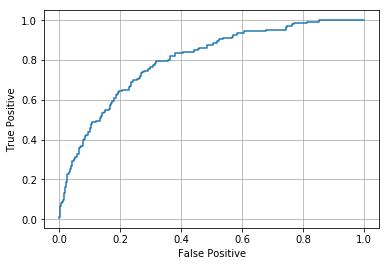

In [316]:
from sklearn.metrics import roc_curve
from sklearn import metrics

yppb = lgst.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, yppb)

pyl.xlabel('False Positive')
pyl.ylabel('True Positive')

pyl.plot(fpr, tpr)
pyl.grid()
pyl.show()

### Exercise on Regularization

Using the Boston house prices [data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):

<ol start="24">
<li> Fit a linear regression model using Ridge regularization and print out the coefficients of the model </li>
<li> Fit a linear regression models using Lasso regularization and print out the coefficients of the model </li>
<li> Describe what is most striking difference between the coefficients of Ridge and Lasso regression.</li>
</ol>

I provide you with some initial code to get you started:

In [317]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

from sklearn.datasets import load_boston
boston = load_boston()

X = np.array([np.concatenate((v,[1])) for v in boston.data])
Y = boston.target

from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#24
rdge = Ridge(alpha = 1.0)
rdge.fit(X_train, Y_train)
print(rdge.coef_)

#25
lsso = Lasso(alpha = 1.0)
lsso.fit(X_train, Y_train)
print(lsso.coef_)

[ -1.08489479e-01   3.22400316e-02   7.77654514e-03   2.54761103e+00
  -9.55753719e+00   4.45865999e+00  -1.21518880e-02  -1.33895694e+00
   2.48449389e-01  -1.14685460e-02  -8.29311305e-01   1.27409150e-02
  -5.24630178e-01   0.00000000e+00]
[-0.07681362  0.02850907 -0.          0.         -0.          1.62599543
  0.01641762 -0.63134137  0.21971739 -0.01228196 -0.70892381  0.0112454
 -0.74758328  0.        ]


### Exercise on Validation

<ol start="26">

<li> In your own words, explain what the last two lines of code do in the following code snippet: </li>

In [318]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
cv.mean()

0.97614938602520218

### Deliverables

<ol start="27">

<li> You should hand in a single python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Include comments in the code to clarify which exercise your code snippet is trying to solve. Use separate code cells to organize your code. Use comments also to provide answers to each task when appropriate.  Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_DSMI_A1.py`. Create your own private repository for you to work on the assignment by using the following link: https://classroom.github.com/a/ozIoYww6
The notebook file and the data files should be available in your own private GitHub repository “https://github.com/OPClasses2/assignment1-YourGithubUserName”. 
</li>